In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = ['NU_INSCRICAO', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA', 
           'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 
           'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 
           'TP_ENSINO', 'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 
           'TP_LOCALIZACAO_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 
           'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 
           'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 
           'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 
           'Q001', 'Q002', 'Q005', 
           'Q006', 'Q024', 'Q025']

In [3]:
dataset = pd.read_csv('MICRODADOS_ENEM_2019.csv', sep=';', encoding = 'ISO-8859-1', usecols = columns)

In [4]:
dataset

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q005,Q006,Q024,Q025
0,190001004627,Santarém,PA,21,M,1,3,3,1,NaN,...,369.1,0,1.0,780.0,D,E,7,B,B,A
1,190001004628,Mãe do Rio,PA,16,F,1,3,0,1,NaN,...,416.5,1,1.0,600.0,D,E,5,B,A,A
2,190001004629,Paragominas,PA,18,F,1,1,0,3,1.0,...,571.5,0,1.0,640.0,H,E,3,C,C,B
3,190001004630,São Sebastião da Boa Vista,PA,23,M,0,3,0,2,1.0,...,NaN,1,NaN,NaN,D,D,3,C,A,A
4,190001004631,Juruti,PA,23,M,1,3,5,1,1.0,...,NaN,1,NaN,NaN,B,C,5,C,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,190006129589,Santo Amaro,BA,28,F,2,2,9,1,1.0,...,NaN,1,NaN,NaN,H,F,1,C,A,B
5095266,190006129590,Salvador,BA,25,M,1,2,4,1,NaN,...,NaN,1,NaN,NaN,B,B,2,A,A,A
5095267,190006129591,Tremedal,BA,18,F,1,3,1,1,1.0,...,NaN,1,NaN,NaN,A,A,5,A,A,B
5095268,190006129592,Salvador,BA,16,M,1,1,0,1,NaN,...,396.7,0,1.0,800.0,G,G,6,I,B,B


In [5]:
# Criando o atribudo media geral
dataset['MEDIA_GERAL'] = (dataset['NU_NOTA_CN'] +dataset['NU_NOTA_CH'] + dataset['NU_NOTA_LC'] + dataset['NU_NOTA_MT'] + dataset['NU_NOTA_REDACAO']) /5

In [6]:
# Exportando CSV
dataset.to_csv('preprocessed_data.csv', index = False)

In [5]:
# Normalização redução do total de campos dos atributos Q001 e Q002.

In [6]:
dataset.Q001.value_counts()

E    1308991
B    1135816
C     723518
D     586620
H     444806
F     375721
A     290615
G     229183
Name: Q001, dtype: int64

In [8]:
dataset.Q001[(dataset.Q001=='A') | (dataset.Q001 == 'B') | (dataset.Q001 == 'C') | (dataset.Q001 == 'D') | (dataset.Q001 == 'H')] = 0
dataset.Q001[(dataset.Q001=='E')] = 1
dataset.Q001[(dataset.Q001=='F') | (dataset.Q001 == 'G')] = 2


/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [9]:
dataset.Q002.value_counts()

E    1633692
B     854826
C     686198
D     667415
F     513711
G     399470
A     194625
H     145333
Name: Q002, dtype: int64

In [10]:
dataset.Q002[(dataset.Q002=='A') | (dataset.Q002 == 'B') | (dataset.Q002 == 'C') | (dataset.Q002 == 'D') | (dataset.Q002 == 'H')] = 0
dataset.Q002[(dataset.Q002=='E')] = 1
dataset.Q002[(dataset.Q002=='F') | (dataset.Q002 == 'G')] = 2

/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [11]:
# Normalização redução do total de campos dos atributos Q006

In [12]:
dataset.Q006.value_counts()

C    1311465
B    1273250
D     499616
E     475568
G     301922
A     232075
F     226251
H     192912
I     143652
J      80789
N      61649
K      58026
Q      57149
O      50203
L      44189
M      43300
P      43254
Name: Q006, dtype: int64

In [13]:
dataset.Q006[(dataset.Q006=='A') | (dataset.Q006 == 'B')] = 0
dataset.Q006[(dataset.Q006=='C')] = 1

/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
dataset.Q006[(dataset.Q006 !=0) & (dataset.Q006 !=1)] = 2

/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
dataset.Q006.value_counts()

2    2278480
0    1505325
1    1311465
Name: Q006, dtype: int64

In [16]:
# Normalização redução do total de campos dos atributos Q024

In [17]:
dataset.Q024.value_counts()

A    2345467
B    2202984
C     384607
D     114655
E      47557
Name: Q024, dtype: int64

In [18]:
dataset.Q024[(dataset.Q024=='A')] = 0
dataset.Q024[(dataset.Q024 !=0)] = 1

/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
dataset.Q024.value_counts()

1    2749803
0    2345467
Name: Q024, dtype: int64

In [20]:
# Normalização redução do total de campos dos atributos Q025

In [21]:
dataset.Q025.value_counts()

B    3954805
A    1140465
Name: Q025, dtype: int64

In [22]:
dataset.Q025[(dataset.Q025=='A')] = 0
dataset.Q025[(dataset.Q025 !=0)] = 1

/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/HenriqueLinhares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
dataset.Q025.value_counts()

1    3954805
0    1140465
Name: Q025, dtype: int64

In [26]:
#plots iniciais 

In [27]:
#total de candidatos em funcao da media geral dos candidatos 

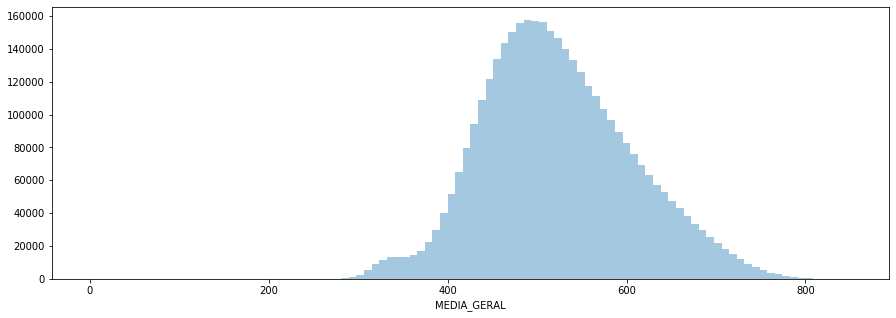

In [28]:
plt.figure(figsize=(15,5))
sns.distplot(dataset['MEDIA_GERAL'], kde=False, bins=100)

In [29]:
#Medai dos canditos por estados 

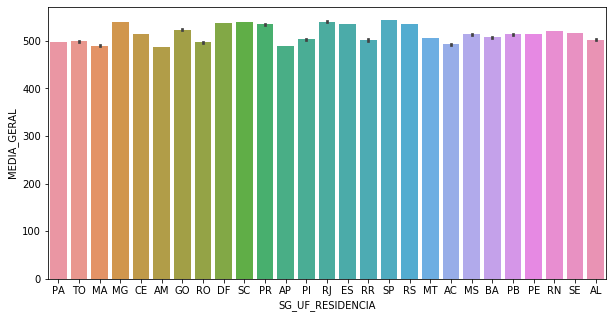

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x='SG_UF_RESIDENCIA', y='MEDIA_GERAL', data=dataset)

In [31]:
corr = dataset.corr()

In [32]:
corr

,NU_INSCRICAO,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,...,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q005,MEDIA_GERAL
NU_INSCRICAO,1.000000,0.073590,0.030469,-0.061546,0.075237,-0.096766,0.005770,0.086941,0.079565,0.016738,...,-0.083204,0.013665,-0.006399,-0.004879,0.025321,-0.023963,0.022389,-0.073068,-0.031557,-0.023811
NU_IDADE,0.073590,1.000000,0.380810,0.054408,0.778143,-0.312943,0.052090,-0.276725,-0.082138,0.010119,...,-0.201027,-0.056845,-0.032498,-0.085970,-0.139390,0.145876,0.056552,-0.167270,-0.133307,-0.138191
TP_ESTADO_CIVIL,0.030469,0.380810,1.000000,0.026363,0.288211,-0.103914,0.020229,-0.076003,-0.019519,-0.000330,...,-0.069977,-0.033126,-0.022710,-0.039353,-0.056428,0.059573,0.021242,-0.065809,-0.068116,-0.060176
TP_COR_RACA,-0.061546,0.054408,0.026363,1.000000,0.048211,-0.059934,0.004193,-0.066570,-0.166783,0.033262,...,-0.029462,-0.190884,-0.184918,-0.191544,-0.196824,0.141699,0.032963,-0.124368,0.089397,-0.208862
TP_ANO_CONCLUIU,0.075237,0.778143,0.288211,0.048211,1.000000,-0.430127,0.013607,-0.267545,NaN,NaN,...,-0.201837,0.018426,0.047753,0.018683,-0.051538,0.126988,-0.004527,-0.066168,-0.147945,-0.028193
TP_ESCOLA,-0.096766,-0.312943,-0.103914,-0.059934,-0.430127,1.000000,-0.013425,-0.221365,0.811156,-0.057432,...,0.158994,0.051999,0.040913,0.034232,0.087851,-0.089620,-0.002075,0.082024,0.064303,0.084040
TP_ENSINO,0.005770,0.052090,0.020229,0.004193,0.013607,-0.013425,1.000000,NaN,-0.006815,-0.002763,...,-0.015351,-0.012101,-0.012223,-0.014246,-0.016142,0.007406,0.008156,-0.023199,-0.005087,-0.021146
IN_TREINEIRO,0.086941,-0.276725,-0.076003,-0.066570,-0.267545,-0.221365,NaN,1.000000,NaN,NaN,...,0.110242,0.028886,0.015729,0.025911,0.055879,-0.110715,0.014567,-0.001331,0.023941,0.022981
TP_DEPENDENCIA_ADM_ESC,0.079565,-0.082138,-0.019519,-0.166783,NaN,0.811156,-0.006815,NaN,1.000000,-0.078053,...,0.100964,0.342434,0.299706,0.280537,0.348001,-0.154545,-0.056623,0.279917,-0.078168,0.372227
TP_LOCALIZACAO_ESC,0.016738,0.010119,-0.000330,0.033262,NaN,-0.057432,-0.002763,NaN,-0.078053,1.000000,...,-0.017866,-0.041052,-0.051182,-0.068877,-0.046685,0.055878,0.017594,-0.044110,0.034832,-0.059851


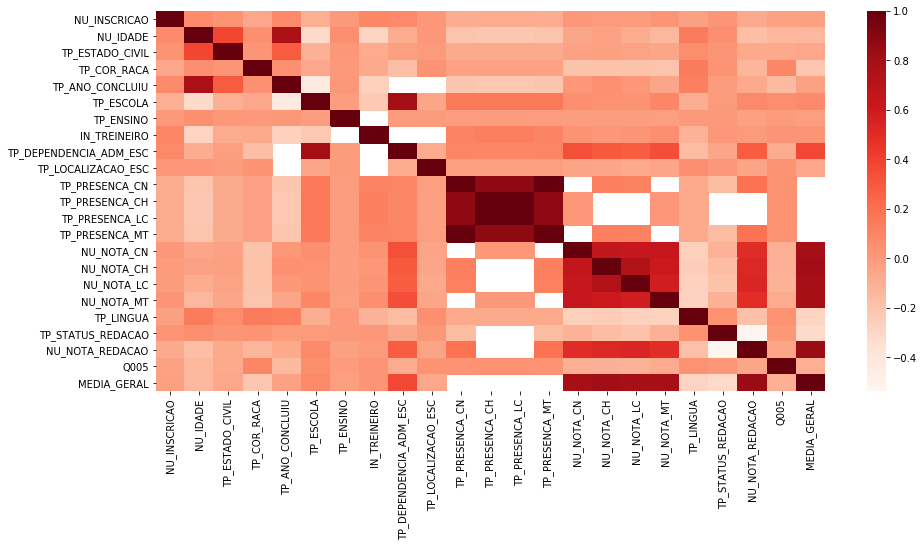

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(corr, cmap='Reds')

## Caracterização do dataset

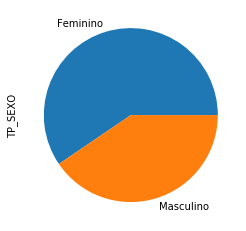

In [43]:
# Inscritos no ENEM 2019
dict_tp_sexo = {"F": "Feminino", "M": "Masculino"}
dataset = dataset.replace({"TP_SEXO": dict_tp_sexo})
dataset['TP_SEXO'].value_counts().plot.pie()

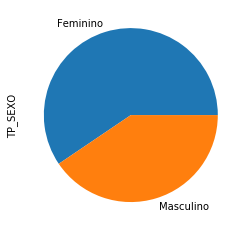

In [44]:
# Presentes (em todas as provas) ENEM 2019
presentes = dataset.query('TP_PRESENCA_CN == 1 & TP_PRESENCA_CH == 1 & TP_PRESENCA_LC == 1 & TP_PRESENCA_MT == 1')
presentes['TP_SEXO'].value_counts().plot.pie()

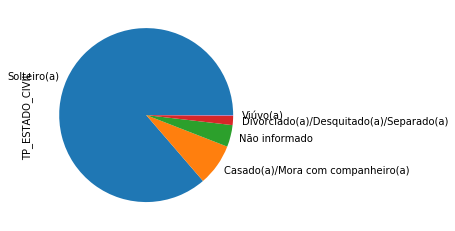

In [45]:
# Estado civil dos incritos no enem 2019
dict_tp_estado_civil = {0: 'Não informado', 1:'Solteiro(a)', 2: 'Casado(a)/Mora com companheiro(a)', 
                        3: 'Divorciado(a)/Desquitado(a)/Separado(a)', 4: 'Viúvo(a)'}
dataset = dataset.replace({"TP_ESTADO_CIVIL": dict_tp_estado_civil})
dataset['TP_ESTADO_CIVIL'].value_counts().plot.pie()

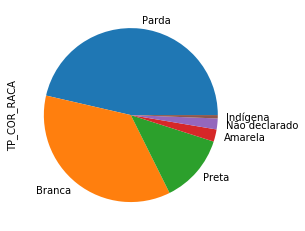

In [46]:
dict_tp_cor_raca = {0: 'Não declarado', 1:'Branca', 2: 'Preta', 
                        3: 'Parda', 4: 'Amarela', 5: 'Indígena'}
dataset = dataset.replace({"TP_COR_RACA": dict_tp_cor_raca})
dataset['TP_COR_RACA'].value_counts().plot.pie()

In [54]:
labels = []
values = []

for y in range(0,120):
    labels.append(str(y))
    values.append(len(dataset[dataset.NU_IDADE == y]))

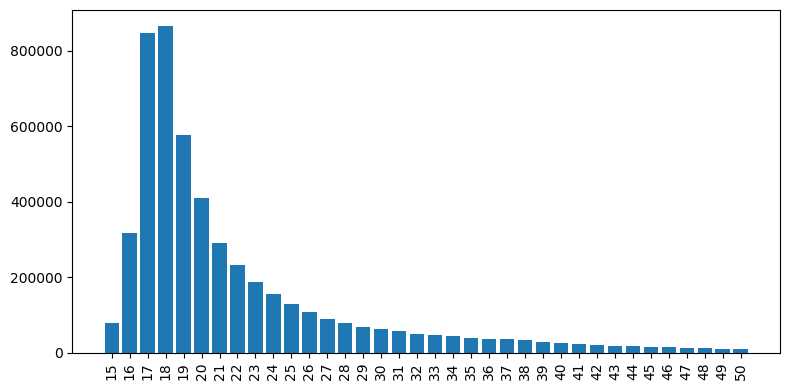

In [55]:
begin, end = 15,50


def render(begin,end):
    _labels = []
    _values = []

    for y in range(begin,end+1):
        _labels.append(labels[y])
        _values.append(values[y])


    plt.clf()
    fig = plt.gcf()
    plt.rcdefaults()
    plt.bar(_labels, _values)
    plt.xticks(rotation=90)
    fig.set_size_inches(8, 4)
    plt.tight_layout()
    plt.show()

render(begin,end)

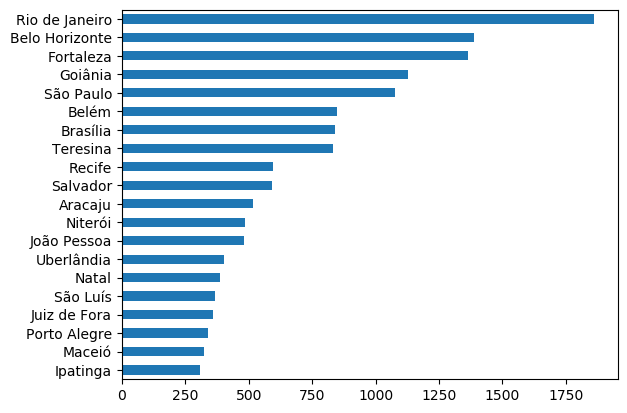

In [57]:
# TOP N Cidades
N = 20
dataset.query('TP_STATUS_REDACAO == 1 and NU_NOTA_REDACAO > 950')['NO_MUNICIPIO_RESIDENCIA'].value_counts().head(N).plot.barh()
plt.gca().invert_yaxis()
